In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import math

In [4]:
# List of 50 stocks
tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NVDA", "META", "BRK-B", "JPM", "V",
    "UNH", "JNJ", "XOM", "PG", "HD", "MA", "CVX", "ABBV", "PEP", "LLY",
    "KO", "MRK", "AVGO", "COST", "MCD", "TMO", "DIS", "CSCO", "ACN", "AMD",
    "CMCSA", "ADBE", "NFLX", "PFE", "DHR", "NKE", "TXN", "LIN", "UNP", "INTC",
    "HON", "IBM", "PM", "CAT", "GE", "NOW", "GS", "BLK", "AXP", "DE"
]

# Download historical data for the past 1 month
# Data is a multi-indexed dataframe with ohlc on the first row and the stock ticker on the second row.
data = yf.download(tickers, period="1m", interval="1d")

[***                    6%%                      ]  3 of 50 completed

Failed to get ticker 'ACN' reason: Expecting value: line 1 column 1 (char 0)


[*******               14%%                      ]  7 of 50 completed

Failed to get ticker 'GOOGL' reason: Expecting value: line 1 column 1 (char 0)


[**********************64%%*****                 ]  32 of 50 completed

Failed to get ticker 'PFE' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  50 of 50 completed


50 Failed downloads:
['KO', 'MSFT', 'PEP', 'AMD', 'AVGO', 'GE', 'PG', 'TXN', 'ACN', 'CVX', 'V', 'GOOGL', 'ADBE', 'CAT', 'CSCO', 'NOW', 'NKE', 'UNH', 'MA', 'META', 'BRK-B', 'LIN', 'IBM', 'LLY', 'ABBV', 'AMZN', 'GS', 'AAPL', 'INTC', 'JPM', 'TSLA', 'MRK', 'BLK', 'MCD', 'HON', 'NVDA', 'JNJ', 'DE', 'AXP', 'PFE', 'CMCSA', 'DHR', 'NFLX', 'XOM', 'TMO', 'COST', 'DIS', 'PM', 'UNP', 'HD']: Exception('%ticker%: No price data found, symbol may be delisted (period=1m)')


In [3]:
data.head()

Empty DataFrame
Columns: [(Adj Close, AAPL), (Adj Close, ABBV), (Adj Close, ACN), (Adj Close, ADBE), (Adj Close, AMD), (Adj Close, AMZN), (Adj Close, AVGO), (Adj Close, AXP), (Adj Close, BLK), (Adj Close, BRK-B), (Adj Close, CAT), (Adj Close, CMCSA), (Adj Close, COST), (Adj Close, CSCO), (Adj Close, CVX), (Adj Close, DE), (Adj Close, DHR), (Adj Close, DIS), (Adj Close, GE), (Adj Close, GOOGL), (Adj Close, GS), (Adj Close, HD), (Adj Close, HON), (Adj Close, IBM), (Adj Close, INTC), (Adj Close, JNJ), (Adj Close, JPM), (Adj Close, KO), (Adj Close, LIN), (Adj Close, LLY), (Adj Close, MA), (Adj Close, MCD), (Adj Close, META), (Adj Close, MRK), (Adj Close, MSFT), (Adj Close, NFLX), (Adj Close, NKE), (Adj Close, NOW), (Adj Close, NVDA), (Adj Close, PEP), (Adj Close, PFE), (Adj Close, PG), (Adj Close, PM), (Adj Close, TMO), (Adj Close, TSLA), (Adj Close, TXN), (Adj Close, UNH), (Adj Close, UNP), (Adj Close, V), (Adj Close, XOM), (Close, AAPL), (Close, ABBV), (Close, ACN), (Close, ADBE), (Close, AMD), (Close, AMZN), (Close, AVGO), (Close, AXP), (Close, BLK), (Close, BRK-B), (Close, CAT), (Close, CMCSA), (Close, COST), (Close, CSCO), (Close, CVX), (Close, DE), (Close, DHR), (Close, DIS), (Close, GE), (Close, GOOGL), (Close, GS), (Close, HD), (Close, HON), (Close, IBM), (Close, INTC), (Close, JNJ), (Close, JPM), (Close, KO), (Close, LIN), (Close, LLY), (Close, MA), (Close, MCD), (Close, META), (Close, MRK), (Close, MSFT), (Close, NFLX), (Close, NKE), (Close, NOW), (Close, NVDA), (Close, PEP), (Close, PFE), (Close, PG), (Close, PM), (Close, TMO), (Close, TSLA), (Close, TXN), (Close, UNH), (Close, UNP), (Close, V), (Close, XOM), ...]
Index: []

[0 rows x 300 columns]

In [13]:
# summary statistics of 'data' dataframe
data.describe()

Adj Close                                                ... Volume  \
           AAPL ABBV  ACN ADBE  AMD AMZN AVGO  AXP  BLK BRK-B  ...    PFE   
count       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0   
mean        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  ...    NaN   
std         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  ...    NaN   
min         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  ...    NaN   
25%         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  ...    NaN   
50%         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  ...    NaN   
75%         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  ...    NaN   
max         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  ...    NaN   

                                                    
        PG   PM  TMO TSLA  TXN  UNH  UNP    V  XOM  
count  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
mean   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
std    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
min    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
25%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
50%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
75%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
max    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[8 rows x 300 columns]

In [14]:
# Check for missing values and sort in descending format to capture values faster.
data.isnull().sum().sort_values(ascending=False)

Volume     XOM     0
Adj Close  AAPL    0
           ABBV    0
           ACN     0
           ADBE    0
                  ..
           DHR     0
           DE      0
           CVX     0
           CSCO    0
           COST    0
Length: 300, dtype: int64

In [15]:
''' 
returns stores the percentage returns of each of the assets on a daily basis
Alternatively you can use 
returns = df.loc["adj_close"].pct_change() * 100
'''

returns = ((data["Adj Close"] - data["Adj Close"].shift(1)) / data["Adj Close"].shift(1)) * 100
print(returns)

Empty DataFrame
Columns: [AAPL, ABBV, ACN, ADBE, AMD, AMZN, AVGO, AXP, BLK, BRK-B, CAT, CMCSA, COST, CSCO, CVX, DE, DHR, DIS, GE, GOOGL, GS, HD, HON, IBM, INTC, JNJ, JPM, KO, LIN, LLY, MA, MCD, META, MRK, MSFT, NFLX, NKE, NOW, NVDA, PEP, PFE, PG, PM, TMO, TSLA, TXN, UNH, UNP, V, XOM]
Index: []

[0 rows x 50 columns]


In [16]:
log_returns = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
print(log_returns)

Empty DataFrame
Columns: [AAPL, ABBV, ACN, ADBE, AMD, AMZN, AVGO, AXP, BLK, BRK-B, CAT, CMCSA, COST, CSCO, CVX, DE, DHR, DIS, GE, GOOGL, GS, HD, HON, IBM, INTC, JNJ, JPM, KO, LIN, LLY, MA, MCD, META, MRK, MSFT, NFLX, NKE, NOW, NVDA, PEP, PFE, PG, PM, TMO, TSLA, TXN, UNH, UNP, V, XOM]
Index: []

[0 rows x 50 columns]


In [17]:
# Select 'AAPL' stock data and extract the 'Close' column
close_prices = data['Close']

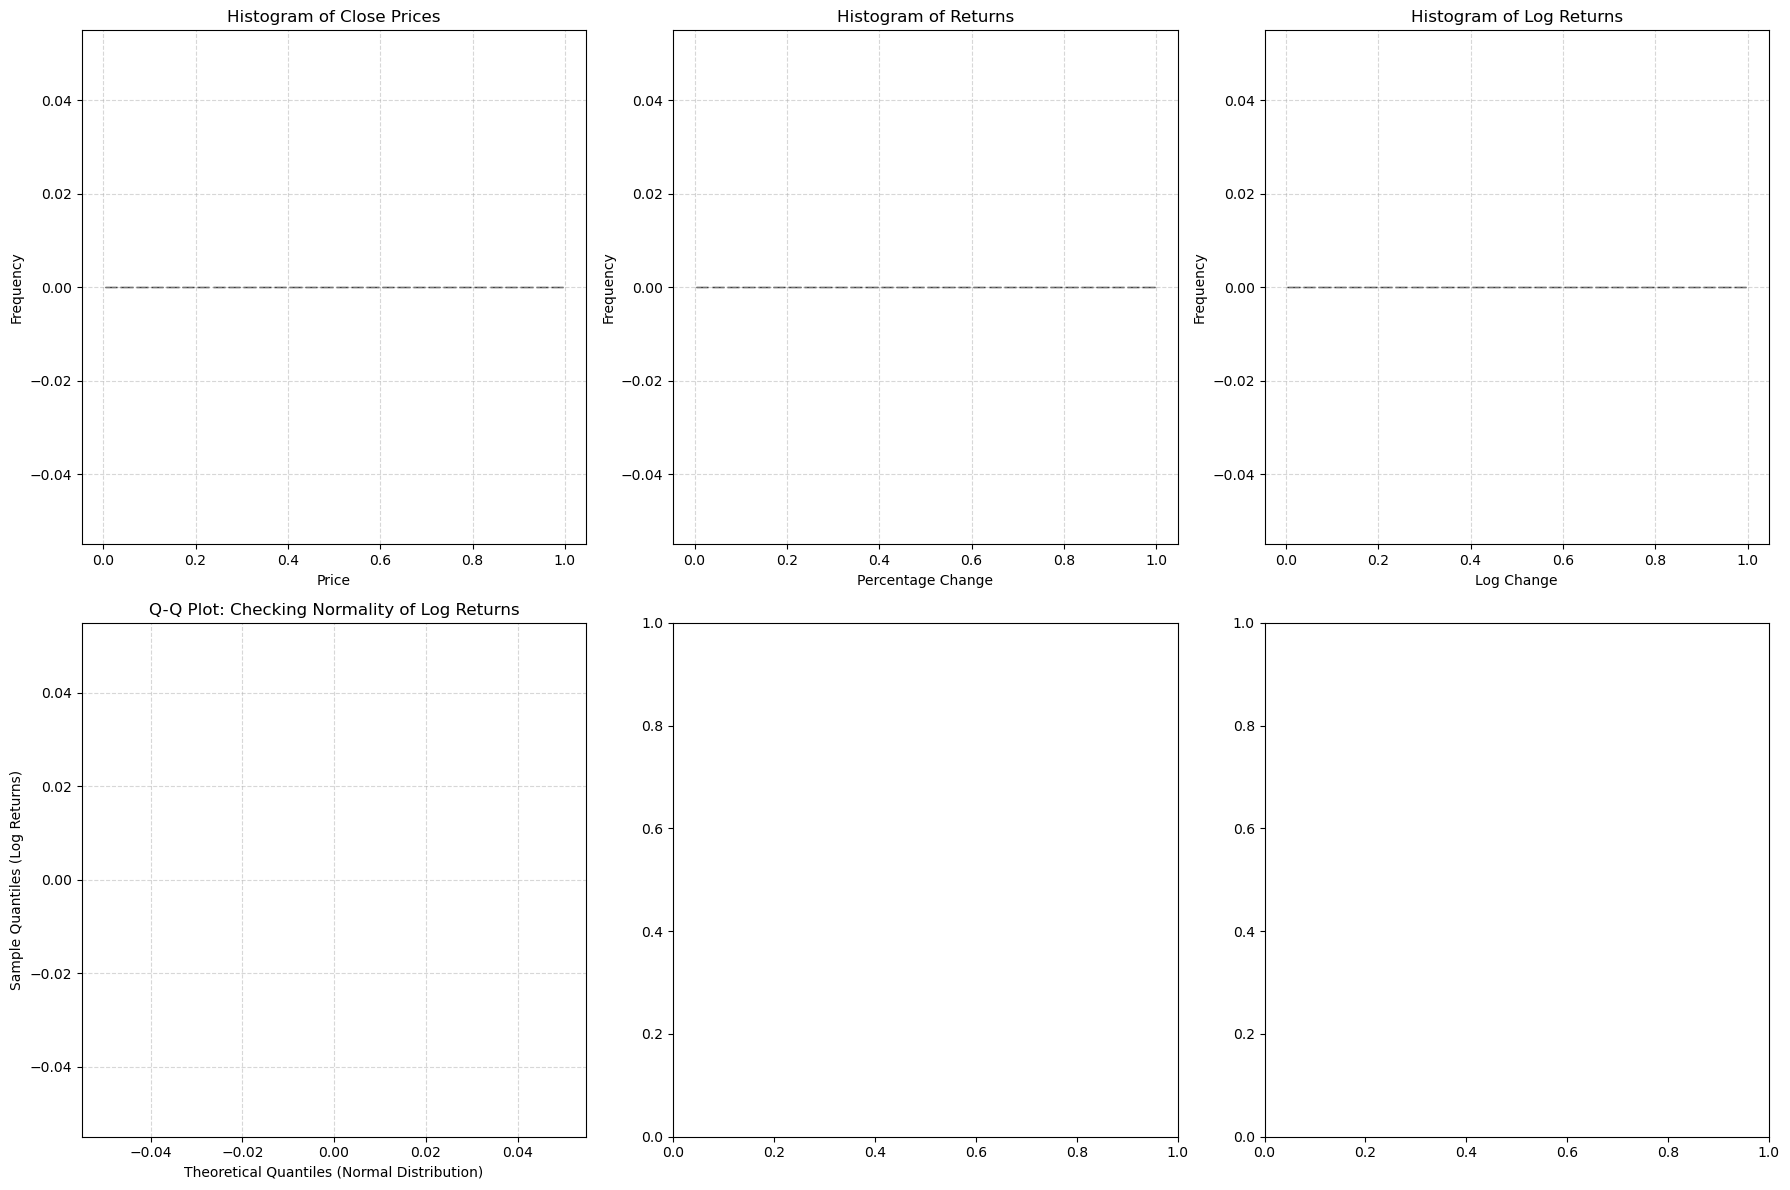

In [18]:
# Create a figure and two subplots (1 row, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# First subplot (left side)
axes[0,0].hist(close_prices, bins=30, edgecolor='black')
axes[0,0].set_title('Histogram of Close Prices')
axes[0,0].set_xlabel('Price')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, linestyle='--', alpha=0.5)

# Second subplot (right side)
axes[0,1].hist(returns, bins=30, edgecolor='black')
axes[0,1].set_title('Histogram of Returns')
axes[0,1].set_xlabel('Percentage Change')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(True, linestyle='--', alpha=0.5)

# Third subplot (right side)
axes[0,2].hist(log_returns, bins=30, edgecolor='black')
axes[0,2].set_title('Histogram of Log Returns')
axes[0,2].set_xlabel('Log Change')
axes[0,2].set_ylabel('Frequency')
axes[0,2].grid(True, linestyle='--', alpha=0.5)

# Sort the dataset
sorted_log_returns = np.sort(log_returns, axis=0)  # Sort by column (each asset)

# Generate theoretical quantiles for each asset (using mean and std for each asset)
mu    = np.mean(log_returns, axis=0)
sigma = np.std(log_returns, axis=0)  

# Generate the theoretical quantiles for each asset (same shape as log_returns)
'''
stats.norm.ppf() computes the percent point function (PPF), which is the inverse of the cumulative distribution function (CDF) for a normal distribution.
The ppf function returns the quantiles for the given probabilities
'''
theoretical_quantiles = np.array([stats.norm.ppf(np.linspace(0, 1, len(sorted_log_returns)), loc=m, scale=s) 
                                  for m, s in zip(mu, sigma)]).T

# Fourth subplot (right side)
# for i in range(log_returns.shape[1]):  # Loop over each asset (50 assets)
#     axes[1,0].scatter(theoretical_quantiles[:, i], sorted_log_returns[:, i], label=f"Asset {i+1}", alpha=0.5)

axes[1,0].scatter(theoretical_quantiles[:, 10], sorted_log_returns[:, 10])
axes[1,0].plot(theoretical_quantiles[:, 10], theoretical_quantiles[:, 10], 'r', linestyle='--')  # Reference line
axes[1,0].set_title('Q-Q Plot: Checking Normality of Log Returns')
axes[1,0].set_xlabel('Theoretical Quantiles (Normal Distribution)')
axes[1,0].set_ylabel('Sample Quantiles (Log Returns)')
axes[1,0].grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping of labels
plt.show()

The histograms of adjusted closing prices and percentage returns reveal distinct statistical characteristics of the dataset.

1. Adjusted Closing Prices: The histogram exhibits a right-skewed (positively skewed) distribution, indicating that while most stock prices cluster at lower values, a few stocks have significantly higher prices. This skewness suggests a long right tail, which is characteristic of financial data where a few large-cap stocks (e.g., AMZN, BRK-B) have disproportionately high prices compared to smaller-cap stocks.

2. Percentage Returns: The histogram of daily percentage returns appears approximately normally distributed, with most values concentrated around zero. This suggests that stock returns exhibit symmetry, with gains and losses distributed fairly evenly around the mean. This aligns with the fundamental assumption in many financial models, such as the log-normal distribution of prices and the normality of short-term returns under the Efficient Market Hypothesis.

# Statistical Interpretation:
The right-skewness in prices implies that using raw price values in models can lead to misleading conclusions due to the large variation in scale across stocks.
The near-normal distribution of percentage returns suggests that using returns instead of prices provides a stationary and scale-independent measure of stock performance, making it more suitable for statistical modeling and risk analysis.

---

# Creating New Features
- Daily log returns
- Daily risk (standard deviation)

In [10]:
# Assign back to the original dataframe under a new column level
log_returns.columns = pd.MultiIndex.from_product([['Log Returns'], log_returns.columns])  # Add new top-level index

In [11]:
# Merge with the original dataframe
data = data.join(log_returns)

In [ ]:
data['Log Returns'].head()

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-16,-0.008466,0.005084,-0.005479,-0.077041,-0.016485,-0.001709,-0.015607,0.000141,-0.005088,0.006276,...,0.003991,0.003179,0.007502,-0.001332,-0.002498,-0.002055,0.001285,-0.015931,-0.008650,0.000000
2024-02-20,-0.004122,-0.009852,-0.017832,-0.008727,-0.048189,-0.014439,-0.015316,-0.000329,0.005163,0.002853,...,-0.001087,0.006329,-0.000112,0.000548,-0.031447,0.014608,-0.000940,0.002228,-0.012317,-0.009493
2024-02-21,0.004177,-0.003477,-0.005637,-0.006275,-0.008485,0.008997,0.000734,-0.007558,0.009155,0.005145,...,0.002895,0.011853,0.010321,0.008556,0.005199,0.008200,0.001745,0.016772,0.005834,0.020232
2024-02-22,0.011181,0.009151,0.028409,-0.001766,0.101604,0.034913,0.061188,0.014593,0.009871,0.014338,...,-0.004346,0.000997,0.006822,0.013725,0.013463,0.008194,0.008641,0.012613,0.024943,-0.000859


In [13]:
#Calculate the standard deviation of the entire dataset
# std_dev_entire = data['Log Returns'].std().sort_values(ascending=False)
# std_dev_entire.plot(kind='bar', figsize=(12,6))
# plt.title('Population Standard Deviation of Assets')
# plt.xlabel('Assets')
# plt.ylabel('Standard Deviation')
# plt.show()

In [14]:
rolling_std_dev = data['Log Returns'].rolling(window=5).std()
print(rolling_std_dev)

                AAPL      ABBV       ACN      ADBE       AMD      AMZN  \
Date                                                                     
2024-02-15       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-16       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-20       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-21       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-22       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2025-02-10  0.016082  0.008434  0.018302  0.020060  0.043389  0.027616   
2025-02-11  0.016346  0.009016  0.016826  0.020613  0.034365  0.024687   
2025-02-12  0.018137  0.008428  0.013680  0.019080  0.020164  0.023555   
2025-02-13  0.019384  0.008008  0.004703  0.019655  0.018074  0.022732   
2025-02-14  0.008199  0.004638  0.004809  0.018383  0.010094  0.012929   

                AVGO       AXP       

In [15]:
# Assign back to the original dataframe under a new column level
rolling_std_dev.columns = pd.MultiIndex.from_product([['Daily Risk'], rolling_std_dev.columns])  # Add new top-level index

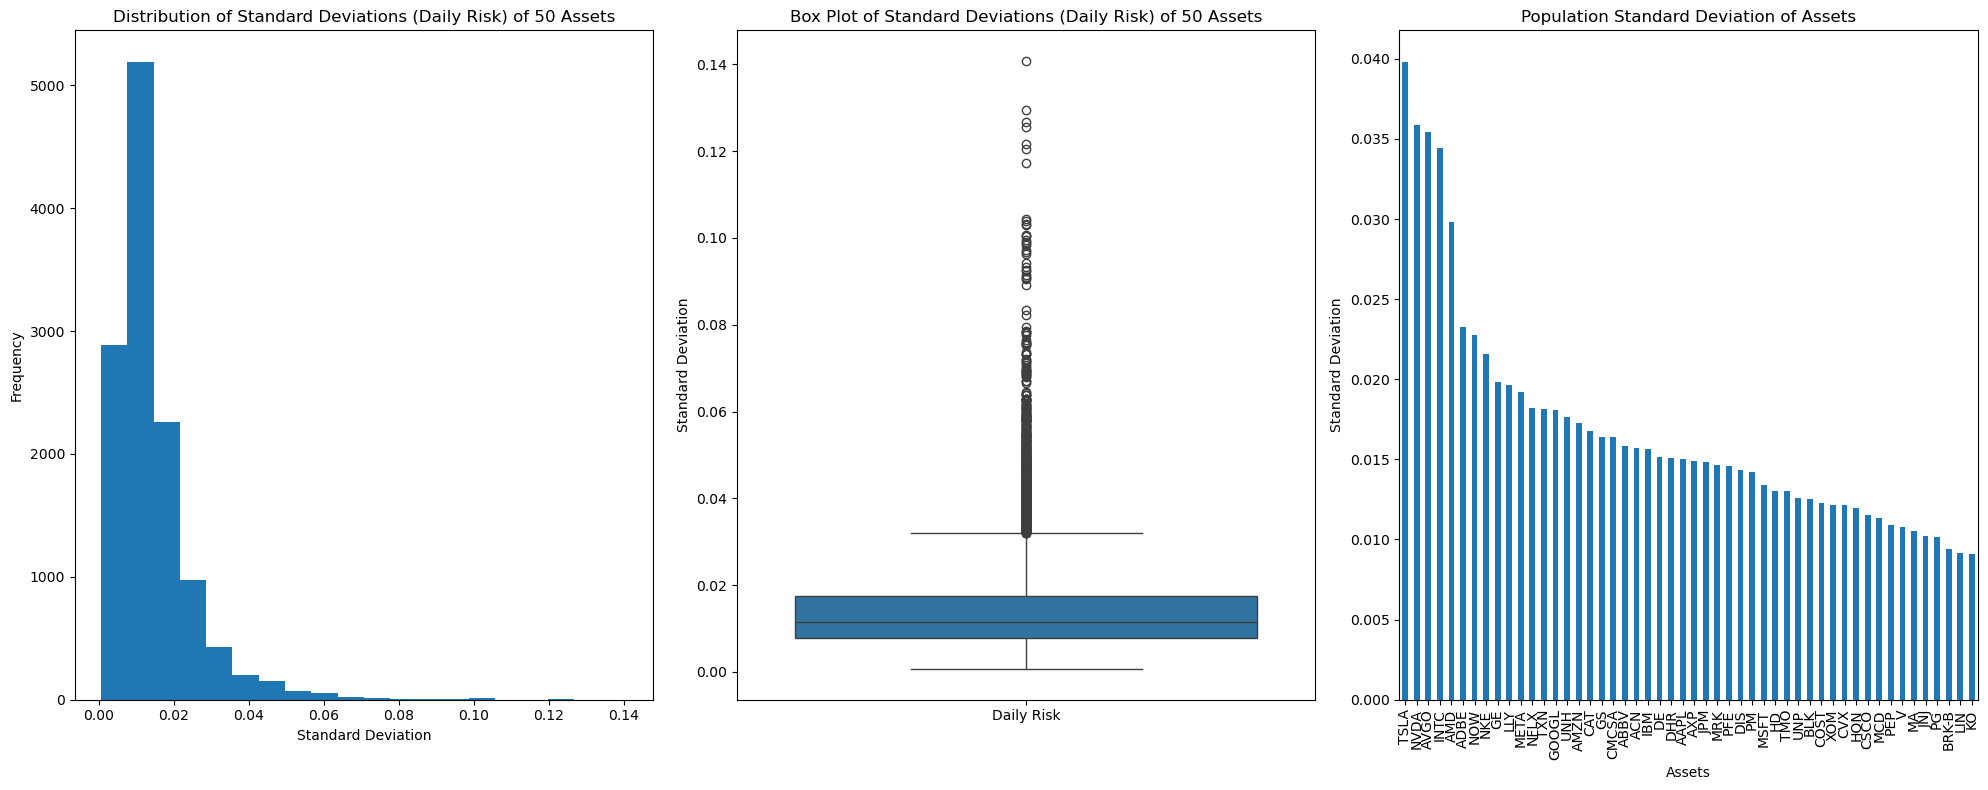

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
std_dev_entire = data['Log Returns'].std().sort_values(ascending=False)

axes[0].hist(rolling_std_dev.values.flatten(), bins=20)
axes[0].set_title('Distribution of Standard Deviations (Daily Risk) of 50 Assets')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')

sns.boxplot(rolling_std_dev, ax=axes[1])
axes[1].set_title('Box Plot of Standard Deviations (Daily Risk) of 50 Assets')
axes[1].set_ylabel('Standard Deviation')

std_dev_entire.plot(kind='bar', ax=axes[2])
axes[2].set_title('Population Standard Deviation of Assets')
axes[2].set_xlabel('Assets')
axes[2].set_ylabel('Standard Deviation')

plt.tight_layout()
plt.show()

# Intuition
1. Most assets have low daily risk (standard deviation): The majority of the assets have relatively small variations in price, and thus their standard deviations are lower.

2. A few assets have high daily risk (standard deviation): There are some assets with much higher volatility, but these are fewer in number. These assets' returns deviate much more from their mean, which shows up as the right tail of the histogram.

The skewness in volatility should be accounted for during random portfolio generation. If randomly sampled from assets without considering skewness, you might create portfolios that are riskier than expected.
Give lower-risk assets a higher probability of selection, Instead of equal probability, adjust selection based on risk—low-volatility assets get chosen more often.

In [17]:
# Merge with the original dataframe
data = data.join(rolling_std_dev)

In [18]:
data['Daily Risk'].head(10)

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-23,0.008974,0.008085,0.018685,0.038932,0.058901,0.018272,0.032195,0.008050,0.006313,0.004438,...,0.004628,0.004253,0.003948,0.006159,0.020066,0.009953,0.003632,0.012861,0.014712,0.012018
2024-02-26,0.008790,0.007988,0.018187,0.015813,0.058276,0.018249,0.030088,0.008903,0.007904,0.012601,...,0.010959,0.006271,0.008829,0.006411,0.029234,0.009444,0.004569,0.013199,0.013537,0.012130
2024-02-27,0.009467,0.005085,0.013891,0.017177,0.050969,0.016329,0.029030,0.008555,0.008850,0.012605,...,0.011333,0.007136,0.009032,0.005826,0.023716,0.007731,0.011983,0.013183,0.011259,0.010923
2024-02-28,0.009839,0.005839,0.012618,0.016568,0.050941,0.016846,0.029679,0.006002,0.009410,0.012892,...,0.011857,0.004723,0.007640,0.006031,0.023825,0.009139,0.016427,0.011703,0.011335,0.005029


In [19]:
data['Log Returns'].head(10)

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-16,-0.008466,0.005084,-0.005479,-0.077041,-0.016485,-0.001709,-0.015607,0.000141,-0.005088,0.006276,...,0.003991,0.003179,0.007502,-0.001332,-0.002498,-0.002055,0.001285,-0.015931,-0.008650,0.000000
2024-02-20,-0.004122,-0.009852,-0.017832,-0.008727,-0.048189,-0.014439,-0.015316,-0.000329,0.005163,0.002853,...,-0.001087,0.006329,-0.000112,0.000548,-0.031447,0.014608,-0.000940,0.002228,-0.012317,-0.009493
2024-02-21,0.004177,-0.003477,-0.005637,-0.006275,-0.008485,0.008997,0.000734,-0.007558,0.009155,0.005145,...,0.002895,0.011853,0.010321,0.008556,0.005199,0.008200,0.001745,0.016772,0.005834,0.020232
2024-02-22,0.011181,0.009151,0.028409,-0.001766,0.101604,0.034913,0.061188,0.014593,0.009871,0.014338,...,-0.004346,0.000997,0.006822,0.013725,0.013463,0.008194,0.008641,0.012613,0.024943,-0.000859
2024-02-23,-0.010085,0.007553,0.016056,0.029094,-0.029803,0.002346,-0.006558,0.002660,0.000184,0.004950,...,0.007594,0.002923,0.004049,0.007501,-0.027944,-0.010574,0.001405,0.009386,-0.000529,-0.008821
2024-02-26,-0.007479,0.004035,0.000424,0.012640,-0.002893,-0.001487,0.009795,0.011124,-0.009336,-0.019556,...,-0.021115,-0.005043,-0.012529,-0.002181,0.037974,0.003720,-0.003648,-0.016760,0.001937,0.003941
2024-02-27,0.008082,0.001006,0.001138,-0.014358,0.011243,-0.006834,-0.009903,0.004690,-0.006834,-0.000562,...,-0.010727,-0.005759,-0.002658,0.004763,0.001654,0.003888,-0.022913,0.002569,-0.003455,-0.002113
2024-02-28,-0.006647,-0.005546,0.000317,-0.001213,-0.008236,-0.002192,-0.005267,0.000229,0.011328,0.007868,...,0.005563,0.004697,0.002658,0.010297,0.011499,-0.011586,-0.029932,0.007905,0.008650,0.002784


In [ ]:
data.isnull().sum().sort_values(ascending=False)

Daily Risk  DIS      5
            DHR      5
            DE       5
            CVX      5
            CSCO     5
                    ..
High        COST     0
            CMCSA    0
            CAT      0
            BRK-B    0
            BLK      0
Length: 400, dtype: int64

---

# Cleaning Data and Preprocessing
- Its ideal to drop the missing values generated by the log returns and daily risk columns since using other methods like backward fill uses future data to estimate past values.(bfill may be useful when filling timestamps).
- Forward fill can be used but in this case the missing data is at the startof the dataset and not at the very end hence it can't work in this case.
- In this case the best approach may be to drop the missing values using dropna() ensuring all calculations start on a level playing field.

In [21]:
# Drop rows with missing data
data = data.dropna()

In [22]:
data.isnull().sum().sort_values(ascending=False)

Daily Risk  MRK     0
            META    0
            MCD     0
            MA      0
            LLY     0
                   ..
Adj Close   AMD     0
            ADBE    0
            ACN     0
            ABBV    0
            AAPL    0
Length: 400, dtype: int64

In [23]:
data.describe()

Adj Close                                                              \
             AAPL        ABBV         ACN        ADBE         AMD        AMZN   
count  246.000000  246.000000  246.000000  246.000000  246.000000  246.000000   
mean   212.928321  175.814447  338.688149  503.454918  151.788171  193.705081   
std     25.857895   12.619625   28.977279   43.689845   21.632772   19.683327   
min    164.224564  150.744324  279.392517  405.920013  107.559998  161.020004   
25%    189.346123  165.301147  313.550537  473.602501  137.827499  179.740005   
50%    222.407982  173.975464  341.591568  503.084991  153.529999  186.459999   
75%    229.757675  188.443916  361.065002  538.587509  164.440002  204.177502   
max    258.735504  201.965424  398.250000  586.549988  211.380005  242.059998   

                                                        ...  Daily Risk  \
             AVGO         AXP          BLK       BRK-B  ...         PFE   
count  246.000000  246.000000   246.000000  246.000000  ...  246.000000   
mean   166.087840  258.111095   887.315662  438.001058  ...    0.013502   
std     33.970274   32.419238   106.629522   25.890407  ...    0.006074   
min    119.376152  212.207321   734.400391  396.730011  ...    0.002719   
25%    137.983414  231.138176   789.188110  410.592491  ...    0.009371   
50%    163.303505  249.201393   861.742920  444.210007  ...    0.012468   
75%    178.227463  287.017677   995.838852  460.092506  ...    0.016945   
max    249.331955  325.869995  1075.500000  483.079987  ...    0.035066   

                                                                               \
               PG          PM         TMO        TSLA         TXN         UNH   
count  246.000000  246.000000  246.000000  246.000000  246.000000  246.000000   
mean     0.008604    0.011296    0.011257    0.035552    0.017008    0.014723   
std      0.005018    0.008740    0.005850    0.017613    0.008081    0.009444   
min      0.002063    0.002052    0.002581    0.004350    0.003161    0.003050   
25%      0.005236    0.006450    0.007103    0.023776    0.010780    0.008334   
50%      0.007231    0.009026    0.010488    0.031887    0.015064    0.011500   
75%      0.010838    0.013009    0.013323    0.043559    0.021390    0.019458   
max      0.032454    0.048569    0.038211    0.094121    0.043069    0.044453   

                                           
              UNP           V         XOM  
count  246.000000  246.000000  246.000000  
mean     0.011144    0.009546    0.011206  
std      0.005747    0.004893    0.004751  
min      0.002730    0.002522    0.001564  
25%      0.007316    0.006487    0.007603  
50%      0.009837    0.008409    0.010625  
75%      0.013706    0.010400    0.014704  
max      0.033318    0.029542    0.022706  

[8 rows x 400 columns]

In [24]:
data.columns.get_level_values(0).unique()

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Log Returns',
       'Daily Risk'],
      dtype='object')

In [ ]:
data.shape

(246, 400)

---
# Generate random Weights

In [ ]:
n_assets = 50  # Number of assets
n_portfolios = 1000  # Number of random portfolios

# Initialize an empty array to store portfolio weights
random_portfolios = np.zeros((n_portfolios, n_assets))

random_portfolios.shape

(1000, 50)

In [27]:
for i in range(n_portfolios):
    weights = np.random.rand(n_assets)  # Generate random values
    # Normalize to sum to 1, This divides each element by the sum of all elements, it is the shorthand for weights = weights / np.sum(weights)
    weights /= np.sum(weights)  
    # copies the weights array into the i-th row of random_portfolios.
    random_portfolios[i] = weights  

# Check if all portfolios sum to 1
print(random_portfolios[:5], np.sum(random_portfolios, axis=1)[:5])  # Show first 5 portfolios

[[3.87392917e-02 1.32404629e-02 5.59230140e-03 1.08828441e-02
  2.08142843e-02 3.96050154e-02 2.24418594e-02 1.53658639e-02
  2.10390974e-02 1.35568956e-02 3.29284368e-02 7.20052882e-03
  2.20514512e-02 4.91910170e-03 1.61055620e-02 1.19809831e-02
  1.35586886e-02 3.85821824e-02 2.89831172e-02 3.74331223e-02
  2.95783051e-02 3.79645804e-02 7.59573423e-03 1.47078270e-02
  1.81299241e-02 2.40428678e-02 6.45427176e-03 5.32139396e-03
  2.39941170e-02 3.79652251e-02 8.94151311e-03 2.63913148e-02
  2.70596130e-02 8.70998949e-03 2.74211380e-02 2.33749827e-02
  1.58147437e-02 1.88059800e-02 3.79949738e-02 1.43906629e-02
  2.21592105e-02 3.87528260e-02 3.73404392e-02 2.37929469e-02
  1.39525435e-02 2.72920259e-03 1.48832505e-03 1.43980306e-02
  4.40224294e-03 1.13039847e-02]
 [2.37323306e-02 1.66390229e-02 3.66306363e-02 2.57785538e-02
  1.86234526e-02 1.89705598e-02 2.70511627e-02 2.66914518e-02
  9.14356008e-03 3.17908759e-02 1.32151311e-04 2.81583021e-02
  2.05178103e-02 5.43552967e-03 3.298

---
# Simulate Portfolio Performance
1. Calculate expected returns. 
    $$
    E(R_p)=
    \sum_{i=1}^{n} w_i .E(R_i)   
    $$
    Where
    $$
    E(R_i) = 
    \frac{1}{n}\sum_{i=1}^{n}\text{Log Returns}
    $$
2. Calculate covariance.
    $$
    \text{cov}(R_i,R_j) = 
    \frac{1}{N - 1}\sum_{n=1}^{N}(R_\text{i,n} - \bar{R_i})(R_\text{j,n} - \bar{R_j})
    $$ 

3. Calculate expected risk (volatility).
    $$ 
    \sigma_p = \sqrt{\sum_{i=1}^{N}w_i^2 \sigma_i^2 + \sum_{\substack{j=i \\ j \neg i}}^{n}w_i.w_j.\text{cov}(R_i,R_j)}
    $$
    - The first sum accounts for the variances of individual assets $(\sigma_i^2)$ weighted by $(w_i^2)$
    - The second sum accounts for covariances between different assets $(\text{cov}(R_i,R_j))$, weighted by $w_i, w_j$
    $$
    \sigma_p = \sqrt{\mathbf{w}^T \mathbf{\Sigma} \mathbf{w}}
    $$
    - Where:
        - $w$ is a (1000, 50) matrix (each row is a random portfolio's weight)
        - $\mathbf{\Sigma}$ is a (50,50) covariance matrix
        - The result is a (1000, 1) matrix (one risk value per portfolio)
    - Intuition
    $$
    \mathbf{w} = 
    \begin{bmatrix}
    w_1 \\w_2 \\w_3 \\\vdots \\w_{n}
    \end{bmatrix}
    $$
    
    $$ 
    \mathbf{\Sigma} =
    \begin{bmatrix}
        \sigma_1^2 & \text{cov}(R_1, R_2) & \dots & \text{cov}(R_1, R_N) \\
        \text{cov}(R_2, R_1) & \sigma_2^2 & \dots & \text{cov}(R_2, R_N) \\
        \vdots & \vdots & \ddots & \vdots \\
        \text{cov}(R_N, R_1) & \text{cov}(R_N, R_2) & \dots & \sigma_N^2
    \end{bmatrix}
    $$ 
    
    $$
    \mathbf{w^T\Sigma} =
    \begin{bmatrix}
    w_1 & w_2 & \cdot & w_n
    \end{bmatrix}
    \begin{bmatrix}
        \sigma_1^2 & \text{cov}(R_1, R_2) & \dots & \text{cov}(R_1, R_N) \\
        \text{cov}(R_2, R_1) & \sigma_2^2 & \dots & \text{cov}(R_2, R_N) \\
        \vdots & \vdots & \ddots & \vdots \\
        \text{cov}(R_N, R_1) & \text{cov}(R_N, R_2) & \dots & \sigma_N^2
    \end{bmatrix}    
    $$
    Each element of the resulting row vector is computed as:
    $$
    \mathbf{w^T\Sigma} =
    \sum_{i=1}^{N} w_i . \text{cov}(R_i,R_j)
    $$

    $$
    \mathbf{w^T\Sigma w} =
    \begin{bmatrix}
        \sum_{i=1}^{N} w_i \cdot \text{cov}(R_i,R_1) & \sum_{i=1}^{N} w_i \cdot \text{cov}(R_i,R_2) & \dots & \sum_{i=1}^{N} w_i \cdot \text{cov}(R_i,R_N)
    \end{bmatrix}
    \begin{bmatrix}
        w_1 \\w_2 \\\vdots \\w_{n}
    \end{bmatrix}    
    $$
    This multiplication is a dot product, so the result is a scalar (a single number):
    $$
    \mathbf{w^T\Sigma w} =
    \sum_{j=1}^{N}(\sum_{i=1}^{N}w_i \cdot \text{cov}(R_i,R_j)) \cdot w_j
    $$
    The double summation can be rewritten by combining the terms:
    $$
    \mathbf{w^T\Sigma w} =
    \sum_{j=1}^{N}\sum_{i=1}^{N}(w_j \cdot w_i \cdot \text{cov}(R_i, R_j))
    $$
    - This is the explicit form of the matrix multiplication. It sums over all possible pairs of assets ($i$ and $j$), weighting their covariances by the product of their weights
    $(w_i, w_j)$
    - The double summation $\sum_{j=1}^{N}\sum_{i=1}^{N}(w_j \cdot w_i \cdot \text{cov}(R_i, R_j))$ include:
        - Diagonal terms $(i = j)$: hese are the terms where $\text{cov}(R_i, R_j) = \sigma_I^2$ so they become $w_i^2 \cdot \sigma_i^2$
        - Off-diagonal terms $(i \neg j)$: These are the terms where $\text{cov}(R_i, R_j)$ captures the covariance between different assets.
    - Thus, the matrix multiplication naturally includes both the individual asset risks $(w_i^2 \sigma_i^2$) and the interactions between assets $(w_iw_j\text{cov}(R_i,R_j))$, matching the expanded formula:
    $$
    \sigma_p =
    \sqrt{\sum_{i=1}^{N}w_i^2 \sigma_i^2 + \sum_{\substack{j=i \\ j \neg i}}^{n}w_i.w_j.\text{cov}(R_i,R_j)}
    $$

In [28]:
# Calculate expected returns of individual assets
expected_returns = data['Log Returns'].mean()
expected_returns.shape

(50,)

In [29]:
print(expected_returns)

AAPL     0.001168
ABBV     0.000500
ACN      0.000229
ADBE    -0.000632
AMD     -0.001931
AMZN     0.001097
AVGO     0.002412
AXP      0.001565
BLK      0.000828
BRK-B    0.000586
CAT      0.000437
CMCSA   -0.000560
COST     0.001559
CSCO     0.001303
CVX      0.000170
DE       0.001269
DHR     -0.000808
DIS      0.000139
GE       0.002233
GOOGL    0.001036
GS       0.002234
HD       0.000496
HON      0.000125
IBM      0.001555
INTC    -0.002395
JNJ     -0.000014
JPM      0.001769
KO       0.000606
LIN      0.000139
LLY      0.000403
MA       0.000756
MCD      0.000267
META     0.001701
MRK     -0.001691
MSFT    -0.000009
NFLX     0.002387
NKE     -0.001409
NOW      0.001012
NVDA     0.002317
PEP     -0.000522
PFE     -0.000062
PG       0.000158
PM       0.002234
TMO     -0.000202
TSLA     0.002395
TXN      0.000523
UNH      0.000040
UNP      0.000004
V        0.000927
XOM      0.000268
dtype: float64


- random_portfolios is a (1000 × num_assets) matrix, where each row is a different portfolio’s weights.
- expected_returns is a (num_assets × 1) column vector of asset expected returns.
- The @ operator performs matrix multiplication, resulting in a (1000 × 1) array, where each row is the expected return of a portfolio.

In [30]:
portfolio_expected_returns = random_portfolios @ expected_returns
portfolio_expected_returns.shape

(1000,)

In [31]:
print(portfolio_expected_returns)

[0.00072165 0.00056014 0.00059193 0.00069101 0.00059012 0.00051766
 0.00050724 0.00070852 0.0006993  0.00059447 0.00029381 0.0007165
 0.00047309 0.00055617 0.00065558 0.00064527 0.00058454 0.00075299
 0.00060573 0.00029759 0.00058467 0.00072236 0.000478   0.00055693
 0.00059187 0.00083352 0.00050453 0.00066323 0.00047855 0.00061412
 0.00060636 0.00056228 0.00050894 0.00055898 0.00077244 0.00052272
 0.0005403  0.00048756 0.00061527 0.00065941 0.00064791 0.00051263
 0.00045546 0.00069605 0.00058888 0.00070732 0.0005896  0.00040241
 0.00054433 0.00055559 0.00068611 0.00076932 0.00061636 0.00066792
 0.00067172 0.00044499 0.00060581 0.00048228 0.00063178 0.0006516
 0.00047287 0.00063466 0.00050894 0.00046516 0.00062094 0.00051237
 0.00064444 0.00046764 0.00067052 0.00059703 0.000451   0.00067385
 0.0005206  0.00065877 0.00062757 0.0007412  0.00071731 0.00055921
 0.0005961  0.0006051  0.00047182 0.00057919 0.00063701 0.0004229
 0.00062507 0.0005341  0.00050091 0.00050477 0.00049347 0.0005879

In [32]:
# Calculate covariance matrix for the portfolio using Log Returns.
cov_matrix = data['Log Returns'].cov()
cov_matrix.head()

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
AAPL,0.000229,-0.000002,0.000036,0.000060,0.000117,0.000087,0.000121,0.000022,0.000053,0.000028,...,0.000017,-0.000004,0.000011,0.000003,0.000217,0.000076,-4.163576e-07,0.000009,0.000020,-1.143048e-07
ABBV,-0.000002,0.000254,0.000008,0.000028,-0.000048,-0.000002,-0.000045,0.000021,0.000017,0.000034,...,0.000071,0.000040,0.000061,0.000061,-0.000086,0.000012,4.192534e-05,0.000040,0.000030,4.134445e-05
ACN,0.000036,0.000008,0.000246,0.000105,0.000062,0.000063,0.000027,0.000044,0.000028,0.000039,...,0.000034,0.000018,0.000006,0.000043,0.000023,0.000041,4.064219e-05,0.000046,0.000045,4.926007e-07
ADBE,0.000060,0.000028,0.000105,0.000527,0.000099,0.000155,0.000188,0.000076,0.000049,0.000037,...,0.000009,-0.000008,0.000005,0.000045,0.000132,0.000062,3.575509e-05,0.000046,0.000051,5.353437e-06
AMD,0.000117,-0.000048,0.000062,0.000099,0.000848,0.000164,0.000495,0.000095,0.000101,0.000019,...,-0.000021,-0.000043,-0.000044,0.000018,0.000364,0.000261,1.508787e-06,0.000035,0.000014,2.705025e-05


In [33]:
# Compute portfolio variance
random_portfolios_t = random_portfolios.T  # (50, 1000)
random_portfolios_t.shape

(50, 1000)

In [34]:
'''
Using np.diag to get the diagonal values of the final portfolio risk matrix as the off-diagonal values are irrelevant and we only 
need a scalar value per portfolio.
'''
portfolio_variances = np.diag(random_portfolios @ cov_matrix @ random_portfolios_t)
portfolio_stdev     = np.sqrt(portfolio_variances)

In [35]:
# Print first 10 portfolio variances
print(portfolio_variances[:10])

[5.85936105e-05 5.97355828e-05 5.90619115e-05 5.43075934e-05
 5.09206828e-05 4.73849863e-05 4.90836371e-05 6.05819388e-05
 5.24336646e-05 5.96274980e-05]


In [36]:
print(portfolio_stdev[:10])

[0.00765465 0.00772888 0.00768517 0.00736937 0.00713587 0.00688368
 0.00700597 0.00778344 0.00724111 0.00772188]


In [37]:
print(portfolio_variances.shape)
print(portfolio_stdev.shape)

(1000,)
(1000,)


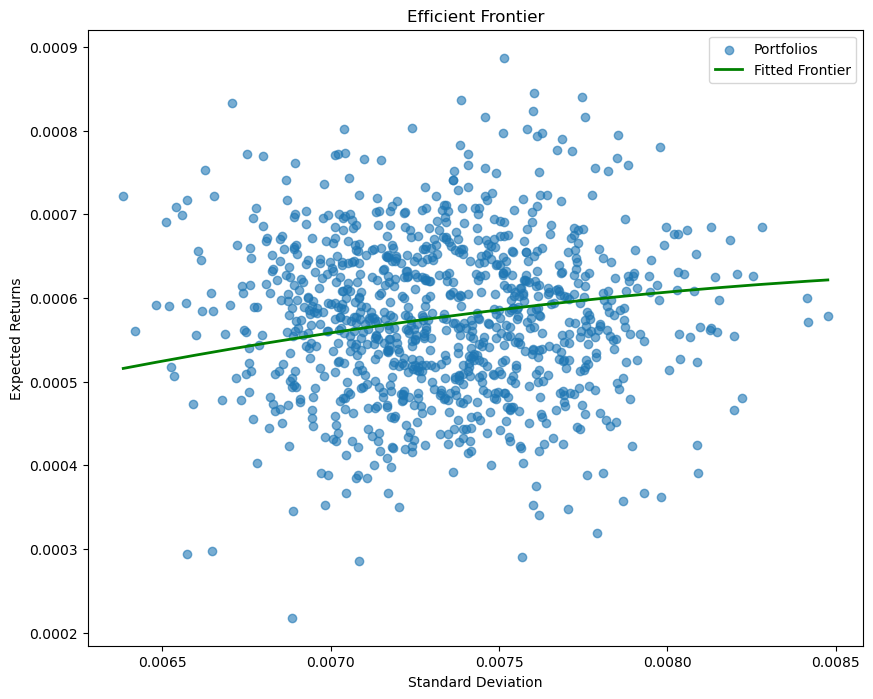

In [44]:
plt.figure(figsize=(10, 8))

# Sorting portfolio_variance, portfolio_stdev and portfolio_expected_returns using an indirect sort by sorting their indeices first usind np.argsort
sorted_indices   = np.argsort(portfolio_variances)  # Sort by variance
sorted_variances = portfolio_variances[sorted_indices]
sorted_stdev     = portfolio_stdev[sorted_indices]
sorted_returns   = portfolio_expected_returns[sorted_indices]

# Fit a quadratic curve (since efficient frontier is often parabolic)
coeffs = np.polyfit(sorted_stdev, sorted_returns, 2)  # 2nd-degree polynomial
fitted_curve = np.poly1d(coeffs)

# Generate points for the fitted curve
x_fitted = np.linspace(min(sorted_stdev), max(sorted_stdev), 100)
y_fitted = fitted_curve(x_fitted)

plt.scatter(x=sorted_stdev, y=portfolio_expected_returns, label='Portfolios', alpha=0.6)
plt.plot(sorted_stdev, fitted_curve(sorted_stdev), color='green', linewidth=2, label='Fitted Frontier')

# Plot the fitted efficient frontier (only the upper part)
# plt.plot(x_fitted, y_fitted, color='green', linewidth=2, label='Efficient Frontier')

plt.ylabel('Expected Returns')
plt.xlabel('Standard Deviation')
plt.title('Efficient Frontier')
plt.legend()
plt.show()

In [39]:
print("Fitted quadratic coefficients:", coeffs)

Fitted quadratic coefficients: [-8.32451415e+04  1.26278216e+01  1.39188339e-04]
